# Build a deep learning model to classify images using Keras and TensorFlow 2.0

Importing Necessary Packages

If you don't have keras or tensorflow installed, Run the following command to install keras and tensorflow (Here, we’ve also installed pillow to facilitate the loading of images later.)

In [259]:
#conda install tensorflow keras pillow

Now import the following packages:
    1) Sequential for initializing the artificial neural network
    2) Convolution2D for implementing the convolution network that works with images
    3) MaxPooling2D for adding the pooling layers
    4) Flatten for converting pooled feature maps into one column that will be fed to the fully connected layer
    5) Dense that will add a fully connected layer to the neural network

In [260]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten, Dropout
from keras.layers import Dense

Initializing the Neural Network

we’ll use the Sequential package to initialize a linear stack of layers.

We now have an instance of the neural network, but it doesn’t do anything by itself. We’ll need to apply a function to the dataset, which means the network needs a convolution layer. We’ll add this layer in the next step.

In [261]:
classifier = Sequential()

Adding a Convolution Layer

The layer is added by calling the add function on the classifier and passing the required parameters. 

The first parameter (filters) is the number of output filters in the convolution. They’re also referred to as feature detectors.

The second and third parameters represent the height and width of the 2D convolution window. input_shape is the shape of the input image. Black and white images are converted to 2D arrays, while colored images are converted to 3D arrays.

A convolution is a mathematical computation involving two functions aimed at finding out how the two functions affect each other.

This process involves three key items; the input image, the feature detector, and the feature map. A feature map is obtained by multiplying the matrix representation of the input image element-wise with the feature detector. This process is aimed at reducing the size of the image, and it retains the features that are important for classifying input images and discards the features that are not. Each feature map detects the location of the image’s unique features.

The final parameter we’ll pass is the activation function. Since image classification is a non-linear task, we’ll use the rectifier function. This makes sure that we don’t get negative values during the operation.

In [262]:
classifier.add(Conv2D(32, (3, 3), input_shape = (256, 256, 3), activation='relu'))

We now have a CNN that will detect features in the images dataset. In the next step, we’ll reduce the size of these features using pooling. This will help in reducing the computation time of the deep learning model.

Pooling to Reduce the Size of the Feature Map

We’ll now add a pooling layer to the network in order to reduce the size of the feature maps. We use a 2x2 pool size for max pooling. This reduces the size of the images while retaining important information.

Max pooling places a 2x2 matrix on the feature map and picks the largest value in that box. The 2x2 matrix moves across the entire feature map and picks the largest value in each move. The obtained values form a matrix known as a pooled feature map.

This process also reduces overfitting because the CNN only receives the features that are important for the classification task.

In [263]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

Flattening the Feature Maps

Time to flatten all the feature maps into a single vector. This vector is then passed to the CNN for processing. This is achieved by calling the Flatten() function on the classifier.

In [264]:
classifier.add(Flatten())

Adding Layers to the Neural Network

The network computes the predictions as well as the errors in the prediction process. The network improves its predictions via backpropagation of the errors. The final result is a number between zero and one. This number represents the probability of each class.

In [265]:
classifier.add(Dense(units = 128, activation='relu'))

We’re now ready to add the output layer. In this layer, we’ll use the sigmoid activation function since we expect a binary outcome. If we expected more than two possible outcomes, we’d have used the softmax function.

In [266]:
classifier.add(Dense(units=1, activation='sigmoid'))

# Build a complete¶

In [267]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (256, 256, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units = 128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [268]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_67 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 28, 28, 128)     

we have to ensure that we’re reducing the errors that occur during the training process. This maximizes the chances of getting good results from the model. Therefore, in the next step, we’ll implement a strategy that will reduce errors during training.

Compiling the CNN is done using the compile function. The function expects three arguments:

1. the optimizer,
2. the loss function,
3. the performance metrics

We’ll apply gradient descent as an optimizer for the model. In this case, the binary_crossentropy loss function is most appropriate since this is a binary classification problem.

Gradient descent is an optimization strategy that works to reduce errors during the training process in order to get to the point where the error is least. This is achieved by finding the point where the cost function is at its minimum. This is known as the local minimum and is found by differentiating the slope at a specific point and descending into the minimum of the cost function. Here, we’ll use the popular Adam optimizer.

In [269]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])


Fitting the CNN

Before we can fit the CNN, we’ll pre-process the images using Keras in order to reduce overfitting. This process is known as image augmentation. We’ll use the ImageDataGenerator function for this purpose.

In [270]:
from keras.preprocessing.image import ImageDataGenerator

Next, we’ll create a training set using train_datagen. Use flow_from_directory to obtain the images from your current working directory. Pass in the path as the first parameter and target_size as the second parameter.

In [271]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [272]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [273]:
TRAIN_DIR = 'C:/Users/nijas/OneDrive/Desktop/GRACE AI/MODEL/train' 
TEST_DIR = 'C:/Users/nijas/OneDrive/Desktop/GRACE AI/MODEL/test'

In [274]:
training_set = train_datagen.flow_from_directory('train', target_size=(256, 256), batch_size=16, class_mode='binary')

Found 192 images belonging to 2 classes.


In [275]:
test_set = test_datagen.flow_from_directory('test', target_size=(256, 256), batch_size=16, class_mode='binary')

Found 96 images belonging to 2 classes.


Fitting the classifier to the training set is done by calling the
fit_generator function on the classifier object. We pass in the training set as the first argument. steps_per_epoch is the number of steps obtained from the generator before one epoch is finished. epochs is the number of iterations used to train the CNN on. validation_steps is the total number of steps to validate before stopping.

In [293]:
history=model.fit_generator(training_set, steps_per_epoch=192//16, epochs=20, validation_data=test_set, validation_steps=96//16)
model.save_weights('first_try.h5')

Epoch 1/20
12/12 [==============================] - 36s 3s/step - loss: 0.6575 - accuracy: 0.5625 - val_loss: 0.6643 - val_accuracy: 0.5104
Epoch 2/20
12/12 [==============================] - 35s 3s/step - loss: 0.6982 - accuracy: 0.5312 - val_loss: 0.6626 - val_accuracy: 0.5104
Epoch 3/20
12/12 [==============================] - 36s 3s/step - loss: 0.6791 - accuracy: 0.6094 - val_loss: 0.6400 - val_accuracy: 0.6771
Epoch 4/20
12/12 [==============================] - 35s 3s/step - loss: 0.6660 - accuracy: 0.6406 - val_loss: 0.5945 - val_accuracy: 0.6667
Epoch 5/20
12/12 [==============================] - 35s 3s/step - loss: 0.6524 - accuracy: 0.6302 - val_loss: 0.7009 - val_accuracy: 0.5000
Epoch 6/20
12/12 [==============================] - 35s 3s/step - loss: 0.6646 - accuracy: 0.5625 - val_loss: 0.6774 - val_accuracy: 0.5000
Epoch 7/20
12/12 [==============================] - 35s 3s/step - loss: 0.6502 - accuracy: 0.5625 - val_loss: 0.6620 - val_accuracy: 0.5000
Epoch 8/20
12/12 [==

Making a Prediction

In [295]:
import numpy as np
from keras.preprocessing import image

In [296]:
test_image = image.load_img('./test/dog/dog.12392.jpg', target_size=(256, 256))

In [297]:
test_image.size

(256, 256)

Since we’re using colored images, we have to transform the test image into a 3D array.

In [298]:
test_image = image.img_to_array(test_image)

In [299]:
test_image.shape

(256, 256, 3)

The image is now in three dimensions. As you probably noticed earlier, we passed in the images in batches. In this case, we’ll have one batch of one input image. The expand_dims method from NumPy will enable us to add this fourth dimension.

The first argument we pass to it is the test image, and the second is the position of the dimension that we want to add.

In [300]:
test_image = np.expand_dims(test_image, axis=0)

In [301]:
test_image.shape

(1, 256, 256, 3)

In [302]:
i = 0
for batch in train_datagen.flow(test_image, batch_size=1,
                          save_to_dir='preview', save_prefix='dog', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # 

Now use the predict method to predict which class the image belongs to:

In [303]:
prediction = model.predict_generator(test_image,1)

In [304]:
prediction

array([[0.00041685]], dtype=float32)

The class_indices attribute from the training set will help us in getting the class labels.

In [305]:
training_set.class_indices

{'cat': 0, 'dog': 1}

In [306]:
batch_size = 16

generator = train_datagen.flow_from_directory(
        'train',
        target_size=(256, 256),
        batch_size=batch_size,
        class_mode=None,  # this means our generator will only yield batches of data, no labels
        shuffle=False)  # our data will be in order, so all first 1000 images will be cats, then 1000 dogs
# the predict_generator method returns the output of a model, given
# a generator that yields batches of numpy data
bottleneck_features_train = model.predict_generator(generator, 192)
# save the output as a Numpy array
#np.save(open('bottleneck_features_train.npy', 'w'), bottleneck_features_train)

generator = train_datagen.flow_from_directory(
        'test',
        target_size=(256, 256),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
bottleneck_features_validation = model.predict_generator(generator, 96)
#np.save(open('bottleneck_features_validation.npy', 'w'), bottleneck_features_validation)

Found 192 images belonging to 2 classes.
Found 96 images belonging to 2 classes.


In [307]:
bottleneck_features_validation

array([[0.451941  ],
       [0.43415135],
       [0.45393682],
       [0.46123078],
       [0.47036746],
       [0.46612537],
       [0.45890042],
       [0.46497568],
       [0.3495946 ],
       [0.43711263],
       [0.43089852],
       [0.5131676 ],
       [0.46368814],
       [0.46179134],
       [0.26086587],
       [0.4054264 ],
       [0.45190084],
       [0.41221625],
       [0.49356937],
       [0.46441185],
       [0.40987942],
       [0.03634283],
       [0.47511348],
       [0.48232478],
       [0.45984027],
       [0.39766744],
       [0.41252884],
       [0.2134673 ],
       [0.45639798],
       [0.45020047],
       [0.43069726],
       [0.43034387],
       [0.5233224 ],
       [0.4298329 ],
       [0.42396036],
       [0.13116816],
       [0.47229895],
       [0.39001137],
       [0.46601453],
       [0.44348556],
       [0.45276955],
       [0.44838566],
       [0.44054797],
       [0.47328728],
       [0.48193422],
       [0.4637719 ],
       [0.21950755],
       [0.077

In [308]:
bottleneck_features_train 

array([[0.22018561],
       [0.44957733],
       [0.4562119 ],
       [0.44627723],
       [0.42751324],
       [0.45491025],
       [0.4606865 ],
       [0.46941447],
       [0.4607754 ],
       [0.4659432 ],
       [0.4640485 ],
       [0.29529282],
       [0.38782525],
       [0.40178758],
       [0.42387483],
       [0.53034765],
       [0.458265  ],
       [0.45763636],
       [0.18334752],
       [0.42610508],
       [0.44645962],
       [0.47046182],
       [0.4783492 ],
       [0.4611588 ],
       [0.4283178 ],
       [0.47000813],
       [0.48434666],
       [0.43727672],
       [0.45771784],
       [0.47300023],
       [0.2754709 ],
       [0.4585419 ],
       [0.4737069 ],
       [0.44388768],
       [0.5157914 ],
       [0.45756498],
       [0.50922996],
       [0.3261057 ],
       [0.37591913],
       [0.5569743 ],
       [0.5128435 ],
       [0.46982056],
       [0.46889332],
       [0.4619732 ],
       [0.4729498 ],
       [0.4882582 ],
       [0.471718  ],
       [0.327

In [309]:
#Get the accuracy score
test_score = model.evaluate_generator(test_set, batch_size)

print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])


[INFO] accuracy: 62.50%
[INFO] Loss:  0.6382875442504883


Text(0.5, 1.0, 'Loss Curves')

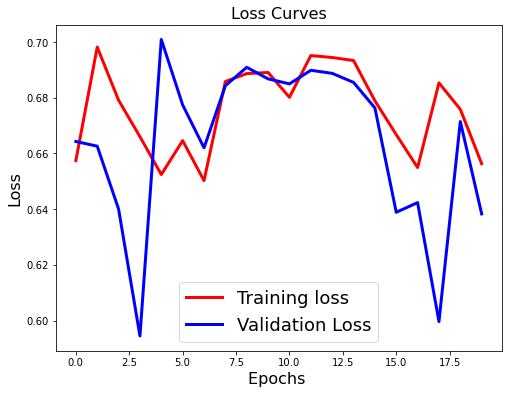

In [311]:
#Plot the Graph
import matplotlib.pyplot as plt
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

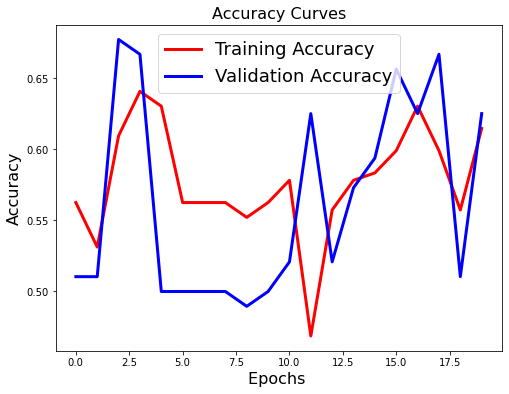

In [312]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
